In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
from pathlib import Path

sys.path.append(str(Path().cwd().parent))

In [3]:
import load_dataset
from plotting import plot_ts

### Возьмем из датасета ряд с минимальными температурами.

In [4]:
dataset = load_dataset.Dataset('../data/dataset/')

In [138]:
ts = dataset['daily-min-temperatures.csv']

In [139]:
ts.head()

1981-01-01
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
1981-01-06    15.8
Name: 20.7, dtype: float64

In [140]:
ts.tail()

1981-01-01
1990-12-27    14.0
1990-12-28    13.6
1990-12-29    13.5
1990-12-30    15.7
1990-12-31    13.0
Name: 20.7, dtype: float64

In [141]:
plot_ts(ts)

Loading BokehJS ...

## Поэтапное построение самого базового пайплайна для прогнозирования

### Задание 1.

Напишите функцию transform_to_matrix, которая бы принимала одномерный ряд и возвращала матрицу лагов

1. Функция должна принимать временной ряд (pd.Series) и количество лагов (оно же количество признаков). 

2. Функция должна проходить по ряду скользящим окном с шириной num_lags и брать лаги текущего окна в качестве признаков, а следующую точку в качестве ответа на данном обьекте.
3. Каждое перемещение окна на одну точку вперед сооветствует новому обьекту матрицы.
4. Функция должная вернуть pd.Dataframe - т.е. матрицу объекты признаки.

In [142]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

In [143]:
def transform_to_matrix(ts, num_lags):
    df = pd.DataFrame()
    for lag in range(num_lags + 1):
        df['lag_' + str(lag)] = ts.shift(lag)
    
    return df

### Задание 2.

In [144]:
from statsmodels.graphics.tsaplots import plot_acf

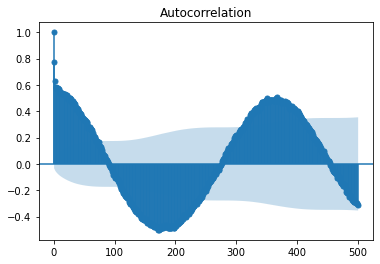

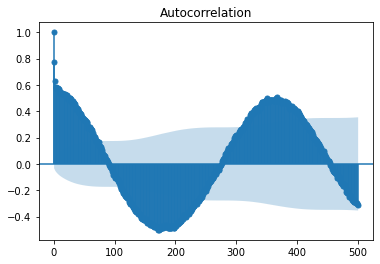

In [145]:
plot_acf(ts, lags=500)

Получите матрицу обьекты-признаки, в качестве ориентировочного значения num_lags выбрав параметр num_lags равный 

In [181]:
lags_matrix = transform_to_matrix(ts, num_lags=365)

In [182]:
lags_matrix.dropna(inplace=True)

### Задание 3.

Добавьте в модель следующие дополнительные признаки

* Для всех лагов кроме целевого на каждой строчке матрицы расчитайте среднее и стандартное отклонение (не включайте текущий лаг на данном объекте, чтобы избежать лика информации из будущего).
  
Для всех обьектов добавьте в качестве признаков следующие datetime признаки
1. timestamp текущего объекта (т.е. того лага который является ответом на данном объекте)
2. год текущего объекта
3. месяц текущего объекта
4. день текущего объекта

Подсказка (получить соответствующие значения можно из аттрибутов обьекта datetime)

In [183]:
lags_matrix['year'] = lags_matrix.index.year
lags_matrix['month'] = lags_matrix.index.month
lags_matrix['day'] = lags_matrix.index.day
lags_matrix['dayofweek'] = lags_matrix.index.dayofweek

### Задание 4.

Разделите на train/test в соотношении примерно 0.7 на 0.3.

Обратите внимание что тест всегда должен быть после трейна, чтобы избежать ликов из будущего, поэтому никакого stratified split

In [184]:
X, y = lags_matrix.drop(columns=['lag_0']), lags_matrix['lag_0'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    shuffle=False)

### Задание 5. 

Обучите модель линейной регрессии из sklearn (LinearRegression, Ridge, Lasso)`

In [185]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred_test = reg.predict(X_test)
print('RMSE :{}'.format(mean_squared_error(y_test, y_pred_test)))

RMSE :5.956252908230357


In [173]:
pred = pd.Series(y_pred_test, index=X_test.index)
true = pd.Series(y_test, index=X_test.index)

In [174]:
plot_ts(ts, pred)

Loading BokehJS ...

In [65]:
reg = Ridge()
reg.fit(X_train, y_train)
y_pred_test = reg.predict(X_test)

In [66]:
pred = pd.Series(y_pred_test, index=X_test.index)
true = pd.Series(y_test, index=X_test.index)

In [67]:
plot_ts(ts, pred)

Loading BokehJS ...

In [186]:
ts = dataset['alcohol_sales.csv']

In [187]:
plot_ts(ts)

Loading BokehJS ...

In [195]:
lags_matrix = transform_to_matrix(ts, num_lags=12)
lags_matrix.dropna(inplace=True)

In [196]:
lags_matrix['mean'] = lags_matrix.iloc[:, 1:].mean(axis=1)
lags_matrix['std'] = lags_matrix.iloc[:, 1:].std(axis=1)

In [197]:
lags_matrix['year'] = lags_matrix.index.year
lags_matrix['month'] = lags_matrix.index.month

In [198]:
X, y = lags_matrix.drop(columns=['lag_0']), lags_matrix['lag_0'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    shuffle=False)

In [199]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred_test = reg.predict(X_test)
# print('RMSE :{}'.format())

In [200]:
pred = pd.Series(y_pred_test, index=X_test.index)
true = pd.Series(y_test, index=X_test.index)

In [201]:
plot_ts(ts, pred)

Loading BokehJS ...